# QBUS6830 Tutorial Lab 1: Basics of Financial Time-Series

### Updated Notebook
First thing, before we start is that most tutorials I will be editing these notebooks in a significant way. So if you do want my updated notebook 

https://github.com/infamoussoap/qbus6830_2021_sem2


## Tasks
* Reading time-stamped data.
* Empirical characteristics of return series.
* Simulation of the Gaussian RW model.

In [1]:
# Run this cell first to import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

## Reading time-stamped data
The `CBA_AX_Daily_0609_0621.csv` file contains daily price series for CBA (Commonwealth Bank of Australia) traded on the ASX (Australian Securities Exchange). We use the `read_csv` function in the `pandas` library to read the data file into an instance of the `DataFrame` object. Please refer to the `pandas` documentation for the exact meaning of each argument of `read_csv`: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [2]:
data = pd.read_csv('CBA_AX_Daily_0609_0621.csv', index_col='Date', parse_dates=True, dayfirst=True)

print(type(data))
print(len(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
3047
(3047, 6)


**Question:** What do the functions `type` and `len` do in Python? What is `data.shape`?

In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-06-01,35.298752,36.094440,34.861122,35.965141,18.989882,4533844
2009-06-02,36.412716,36.412716,35.626972,36.134224,19.079163,4328304
2009-06-03,36.283417,36.900074,36.014870,36.601692,19.325993,4871737
2009-06-04,36.800613,37.198460,36.442554,36.591743,19.320740,4617218
2009-06-05,37.019428,37.447109,36.174007,36.313255,19.173695,4441440
...,...,...,...,...,...,...
2021-06-10,101.000000,102.120003,100.769997,101.849998,101.849998,1791330
2021-06-11,101.000000,101.695000,100.820000,101.360001,101.360001,1740852
2021-06-15,101.500000,103.720001,101.459999,103.449997,103.449997,2296140


In [4]:
# Summary of a DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3047 entries, 2009-06-01 to 2021-06-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3047 non-null   float64
 1   High       3047 non-null   float64
 2   Low        3047 non-null   float64
 3   Close      3047 non-null   float64
 4   Adj Close  3047 non-null   float64
 5   Volume     3047 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 166.6 KB


In [5]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-06-01,35.298752,36.094440,34.861122,35.965141,18.989882,4533844
2009-06-02,36.412716,36.412716,35.626972,36.134224,19.079163,4328304
2009-06-03,36.283417,36.900074,36.014870,36.601692,19.325993,4871737
2009-06-04,36.800613,37.198460,36.442554,36.591743,19.320740,4617218
2009-06-05,37.019428,37.447109,36.174007,36.313255,19.173695,4441440
...,...,...,...,...,...,...
2021-06-10,101.000000,102.120003,100.769997,101.849998,101.849998,1791330
2021-06-11,101.000000,101.695000,100.820000,101.360001,101.360001,1740852
2021-06-15,101.500000,103.720001,101.459999,103.449997,103.449997,2296140


In [6]:
# Fist five rows
data.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-06-01,35.298752,36.094440,34.861122,35.965141,18.989882,4533844
2009-06-02,36.412716,36.412716,35.626972,36.134224,19.079163,4328304


In [7]:
# Last five rows
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-10,101.000000,102.120003,100.769997,101.849998,101.849998,1791330
2021-06-11,101.000000,101.695000,100.820000,101.360001,101.360001,1740852
2021-06-15,101.500000,103.720001,101.459999,103.449997,103.449997,2296140
2021-06-16,104.010002,104.940002,103.410004,104.820000,104.820000,2775509
2021-06-17,105.500000,106.570000,105.110001,105.910004,105.910004,3930519


In [8]:
# Timestamped data can be sliced by using date strings
data['04-2019']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-01,71.000000,71.769997,71.000000,71.360001,65.647118,1893435
2019-04-02,71.900002,72.160004,71.254997,71.379997,65.665512,2267274
2019-04-03,71.510002,71.690002,71.050003,71.389999,65.674713,2582854
2019-04-04,71.519997,71.580002,70.959999,71.230003,65.527534,2364739
2019-04-05,71.059998,71.250000,70.629997,70.889999,65.214745,2601681
2019-04-08,71.010002,71.070000,70.500000,70.669998,65.012360,2086127
2019-04-09,70.559998,70.599998,69.720001,70.250000,64.625984,2741284
2019-04-10,70.139999,71.029999,70.029999,70.750000,65.085960,2079661
2019-04-11,70.269997,70.459999,70.000000,70.260002,64.635185,3282063


In [9]:
# Start at August 2017 end at August 2019
data['01-2017':'07-2019']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,82.400002,83.160004,82.309998,82.970001,66.536613,1967692
2017-01-04,83.500000,83.760002,83.199997,83.610001,67.049858,2086820
2017-01-05,83.989998,84.120003,83.589996,83.849998,67.242317,2049692
2017-01-06,83.980003,84.180000,83.620003,84.129997,67.466866,2648142
2017-01-09,84.279999,85.650002,84.175003,85.260002,68.373055,2742640
...,...,...,...,...,...,...
2019-07-25,82.730003,83.000000,82.370003,83.000000,76.355255,3721233
2019-07-26,82.989998,83.290001,82.529999,82.589996,75.978073,6715835
2019-07-29,82.800003,83.449997,82.379997,83.250000,76.585236,3280357


In [10]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-06-01,35.298752,36.094440,34.861122,35.965141,18.989882,4533844
2009-06-02,36.412716,36.412716,35.626972,36.134224,19.079163,4328304
2009-06-03,36.283417,36.900074,36.014870,36.601692,19.325993,4871737
2009-06-04,36.800613,37.198460,36.442554,36.591743,19.320740,4617218
2009-06-05,37.019428,37.447109,36.174007,36.313255,19.173695,4441440
...,...,...,...,...,...,...
2021-06-10,101.000000,102.120003,100.769997,101.849998,101.849998,1791330
2021-06-11,101.000000,101.695000,100.820000,101.360001,101.360001,1740852
2021-06-15,101.500000,103.720001,101.459999,103.449997,103.449997,2296140


In [11]:
# This is how you index a column by name
p = data['Adj Close']
print(p)
print("")
print(type(p))

Date
2009-06-01     18.989882
2009-06-02     19.079163
2009-06-03     19.325993
2009-06-04     19.320740
2009-06-05     19.173695
                 ...    
2021-06-10    101.849998
2021-06-11    101.360001
2021-06-15    103.449997
2021-06-16    104.820000
2021-06-17    105.910004
Name: Adj Close, Length: 3047, dtype: float64

<class 'pandas.core.series.Series'>


### Plotting
We primarily use the `matplotlib` library for plotting. Each plot should at least contain axis labels (both horizontal and vertical) and a title. Below is an example of a time series plot of the adjusted closing prices of CBA.

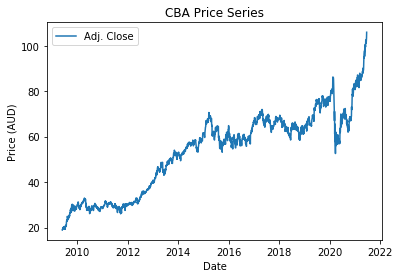

In [12]:
plt.plot(p, label='Adj. Close')
plt.xlabel('Date')
plt.ylabel('Price (AUD)')
plt.title('CBA Price Series')
plt.legend();

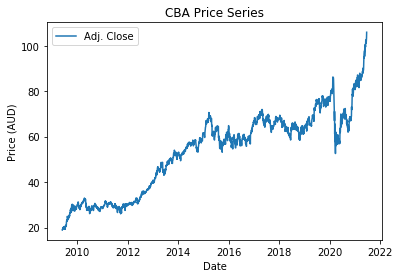

In [13]:
plt.plot(p, label='Adj. Close')
plt.xlabel('Date')
plt.ylabel('Price (AUD)')
plt.title('CBA Price Series')
plt.legend()
plt.show()

**Question:** Discuss the properties of CBA prices over the past decade or so. Are they predictable? Stable over time?  (in less than 0.5 pages)

**Answer guide**  Prices rose to more than 4 times their 2009 level (of about AUD 20) reaching a maximum above AUD 80 in early 2020, then dropped sharply to about AUD 55. Prices have again risen since early 2020, to be above AUD 100 by June, 2021. 
The effect of uncertainty around Covid-19 is a possible explaination for the sharp drop in early 2020. 

Predictable? Stable?? Prices are not generally predictable. They move in the fashion of a "random walk", though with apparently changing variance from day to day. Prices can drop sharply or slowly and/or rise quickly or slowly, they are rarely stable looking and do not seem to follow a consistent pattern. There is, however, a long-term upwards trend.


# Closing Prices vs Returns

Before we continue, it is a good idea to see how returns differs to closing prices.

So below I have 2 timeseries, one is the returns from CBA and the other is the returns from a simulated gaussian random walk.

Now, when we look at their closing prices they basically look the same. But, when we look at the returns they actually tell a completely different story.

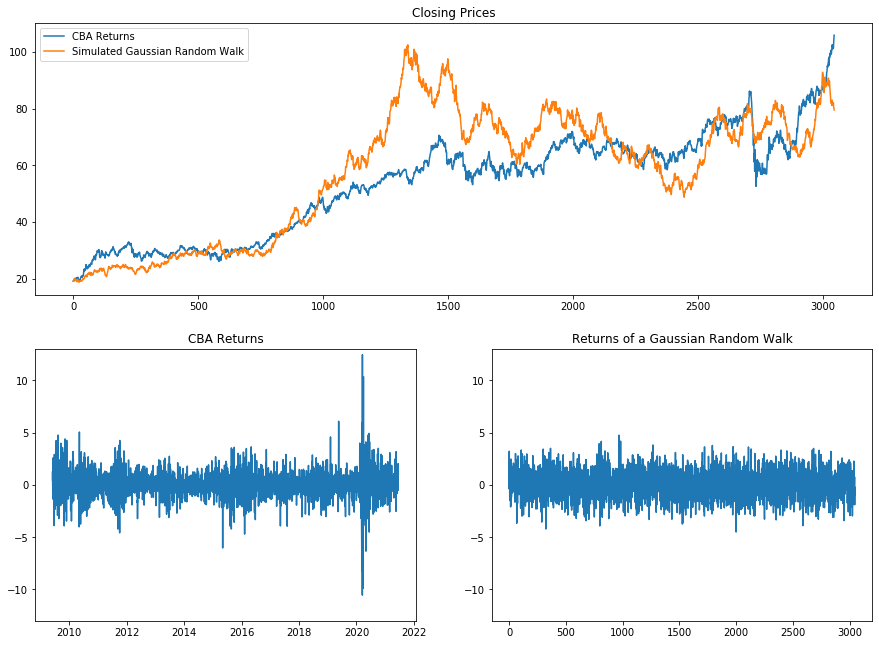

In [14]:
# Dont worry about this code. This code is just to prove my point
r = (np.log(p).diff() * 100)[1:]

plt.figure(figsize=(15, 11))

np.random.seed(5)
gaussian_returns = np.random.normal(np.mean(r), np.std(r), size=len(r))
cba_open_price = p[0]

plt.subplot(2, 1, 1)
plt.plot(np.cumprod(np.exp(r.values/100)) * cba_open_price, label='CBA Returns')
plt.plot(np.cumprod(np.exp(gaussian_returns/100)) * cba_open_price, label='Simulated Gaussian Random Walk')
plt.title("Closing Prices")
plt.legend();

plt.subplot(2, 2, 3)
plt.plot(r)
plt.title('CBA Returns')
plt.ylim(-13, 13)

plt.subplot(2, 2, 4)
plt.plot(gaussian_returns)
plt.ylim(-13, 13)
plt.title("Returns of a Gaussian Random Walk");

There are 2 important things to saee when we look at the returns.

1. The range of the cba returns is much larger than the gaussian random walk
2. The range of the cba returns also changes in time. In particular you can see that during 2012-2014 the volatility is pretty small when compared with 2020-2021

# The Gaussian Random Walk Model

The most important thing that we will look at this tutorial is the idea that

$$\large \log P_{t} = \log P_{t-1} + r_t$$

where $r_t$ follows some probability distribution. In the gaussian random walk model, $r_t\sim\mathcal{N}(\mu,\sigma^2)$, meaning that the returns follow a normal distribution (or gaussian distribution). So the rest of this tutorial we are going to see if $r_t = \log(P_{t}) - \log(P_{t-1})$ is in fact a Gaussian distribution.

## Empirical characteristics of return series
In QUBS6830, we focus on percentage **log-returns**, calculated using:
$$
r_t = \log\left(\frac{P_t}{P_{t-1}}\right) \times 100 = [\log(P_t) - \log(P_{t-1})] \times 100.
$$

In [15]:
r = np.log(p).diff() * 100
r

Date
2009-06-01         NaN
2009-06-02    0.469049
2009-06-03    1.285418
2009-06-04   -0.027185
2009-06-05   -0.763984
                ...   
2021-06-10    0.758882
2021-06-11   -0.482258
2021-06-15    2.040983
2021-06-16    1.315622
2021-06-17    1.034512
Name: Adj Close, Length: 3047, dtype: float64

In [16]:
r = r[1:]
print(r.describe())

count    3046.000000
mean        0.056424
std         1.301812
min       -10.542749
25%        -0.601618
50%         0.050539
75%         0.755323
max        12.453254
Name: Adj Close, dtype: float64


In [17]:
# Sample quantiles
print(np.quantile(r, [0.001, 0.005, 0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 0.995, 0.999]))

[-6.93100631 -3.99801558 -3.27015869 -1.32761159 -0.60161813  0.0505394
  0.75532263  1.39214275  3.43675768  4.218731    6.07858637]


In [18]:
# Let us try that again
quantiles = [0.001, 0.005, 0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 0.995, 0.999]

for quantile in quantiles:
    print(f"Sample Quantile {format(quantile, '0>.3f')} = {np.quantile(r, quantile)}")

Sample Quantile 0.001 = -6.931006310019217
Sample Quantile 0.005 = -3.998015581721234
Sample Quantile 0.010 = -3.270158693308618
Sample Quantile 0.100 = -1.3276115902882246
Sample Quantile 0.250 = -0.6016181258236886
Sample Quantile 0.500 = 0.05053939556090015
Sample Quantile 0.750 = 0.7553226278055214
Sample Quantile 0.900 = 1.392142746813585
Sample Quantile 0.990 = 3.436757676643665
Sample Quantile 0.995 = 4.2187310032685925
Sample Quantile 0.999 = 6.078586371908274


So what do these quantiles mean:

- Quantile 0.25 = -0.6016 means that you would expect returns to be **less than** -0.6016 about 25% of the time. Mathematically, this is saying that
$$\mathbb{P}[r_t < -0.6016] = 0.25$$

- Quantile 0.5 = 0.0505 means that you would expect returns to be **less than** 0.0505 about 50% of the time.
- Quantile 0.995 = 4.218 means that you would expect returns to be **less than** 4.128 about 99.5% of the time

Note that these are the raw quantiles that you get from the dataset

In [19]:
np.sum(r < 0.05) / len(r)

0.5

So why is this important. If $r_t$ is in fact normally distributed then we should expect the quantiles to be

In [20]:
for quantile in quantiles:
    val = stats.norm.ppf(quantile, np.mean(r), np.std(r))
    print(f"Normal Distribution Quantile {format(quantile, '0>.3f')} = {val}")

Normal Distribution Quantile 0.001 = -3.9658176778199286
Normal Distribution Quantile 0.005 = -3.2962714649209506
Normal Distribution Quantile 0.010 = -2.971546792892756
Normal Distribution Quantile 0.100 = -1.6116414112308732
Normal Distribution Quantile 0.250 = -0.8214906201335355
Normal Distribution Quantile 0.500 = 0.05642427457699737
Normal Distribution Quantile 0.750 = 0.9343391692875302
Normal Distribution Quantile 0.900 = 1.724489960384868
Normal Distribution Quantile 0.990 = 3.0843953420467507
Normal Distribution Quantile 0.995 = 3.409120014074945
Normal Distribution Quantile 0.999 = 4.078666226973923


Okay, so what is the difference between the normal distribution's quantile and the quantiles from CBA

For the normal distribution, about 1% of the time we would expect returns to be less than -2.97%. But, the true quantile for CBA says that about 1% of the time we would expect returns to be less than -3.27%. So in the real world, we actually loose more money then what a gaussian distribution is telling us.

- Gaussian distribution says that 1 out of 100 days, we will loose more than 2.97%
- CBA says that 1 out of 100 days, we will loose more than 3.27%

But let us compare this with the students-t distribution

In [21]:
# Just Ignore
df = pd.DataFrame(columns=['CBA Sample Quantile', 'Normal Quantile', 'Student-t Quantile'])

for quantile in quantiles:
    sample_quantile = np.quantile(r, quantile)
    normal_quantile = stats.norm.ppf(quantile, np.mean(r), np.std(r))
    students_t_quantile = stats.t.ppf(quantile, 8, np.mean(r), np.std(r))
    
    df.loc[quantile, :] = [sample_quantile, normal_quantile, students_t_quantile]
df

,CBA Sample Quantile,Normal Quantile,Student-t Quantile
0.001,-6.93101,-3.96582,-5.8018
0.005,-3.99802,-3.29627,-4.31094
0.010,-3.27016,-2.97155,-3.7136
0.100,-1.32761,-1.61164,-1.76167
0.250,-0.601618,-0.821491,-0.863008
0.500,0.0505394,0.0564243,0.0564243
0.750,0.755323,0.934339,0.975856
0.900,1.39214,1.72449,1.87452
0.990,3.43676,3.0844,3.82645
0.995,4.21873,3.40912,4.42379


In [22]:
print(r.skew())  # Skew of Gaussian is 0
print(r.kurtosis())  # Kurtosis of Gaussian is 3

0.0126536725201957
9.517581791418301


**Question:** Based on these summary stats, discuss the general properties of percentage log returns for CBA (in less than 0.5 pages)

**Answer guide** The average and median daily return are around 0.05\%, which is very small in practical financial terms. The number or proportion of positive and negative returns seem very similar to each other (i.e. close to 50\%). The skewness, while slightly positive (0.013), is very close to 0, meaning the data are close to a symmetric distribution. The kurtosis is well above 3, indicating the fat-tailed nature of financial returns.  

**Question:** What level might an investor expect a daily return to be less than on only 0.1% of days, when investing in CBA stock? What does your estimate depend on?

**Answer guide** The 0.1 percentile of CBA returns is estimated to be -6.93\%; i.e. 0.1\% of CBA returns in this sample are below -6.93\%. This a sample percentile estimate; implicitly it relies on a concept called stationarity, in this case meaning that the (unconditional) distribution of the CBA returns remains constant over time. 

As a counter-example, imagine if the long run distribution of CBA returns changed in 2021, i.e. if the distribution suddenly had much fatter tails than for 2009-2020. In that case, using the data from 2009-2020 may not tell us much at all to accurately estimate the 0.1 (or any other) percentile. Only if the distribution of data in 2009-2020 matches (approximately) that in 2021, can we use all the data to estimate the 0.1 (or any other) percentile.  

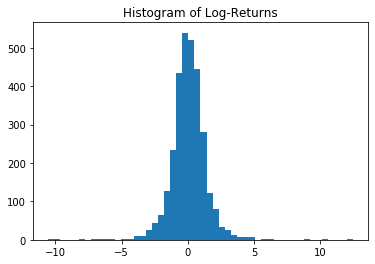

In [23]:
plt.hist(r, 50)
plt.title('Histogram of Log-Returns')
plt.show()

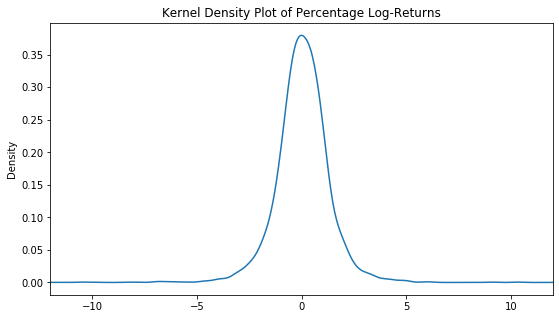

In [24]:
# The DataFrame class offers methods for plotting too,
# e.g., the kernel density plot.
plt.figure(figsize=(9, 5))

r.plot.kde()
plt.title('Kernel Density Plot of Percentage Log-Returns')
plt.xlim(-12, 12) # NB these liimts are approx the min, max of the data
plt.show()

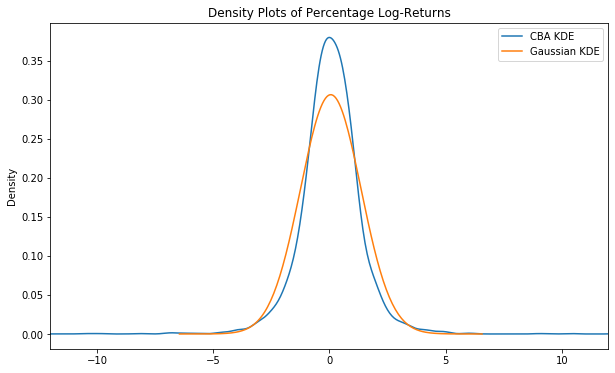

In [25]:
# The DataFrame class offers methods for plotting too,

plt.figure(figsize=(10, 6))

r.plot.kde(label='CBA KDE')  # blue
plt.title('Density Plots of Percentage Log-Returns')
plt.xlim(-12, 12) # NB these liimts are approx the min, max of the data

# We can add a Gaussian distribution, with same man and variance as CBA returns, to this plot
r_vec = r.values
x = np.linspace(r.mean() - 5*np.std(r_vec), r.mean() + 5*np.std(r_vec), 200)
plt.plot(x, stats.norm.pdf(x, r.mean(), np.std(r_vec)), label='Gaussian KDE')  # orange

plt.legend()
plt.show()

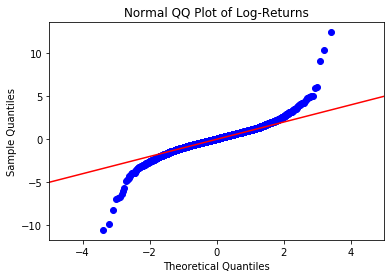

In [26]:
# For QQ plots, we can use the `statsmodels` library
sm.qqplot(r, line='45')
plt.title('Normal QQ Plot of Log-Returns')
plt.xlim(-5, 5);

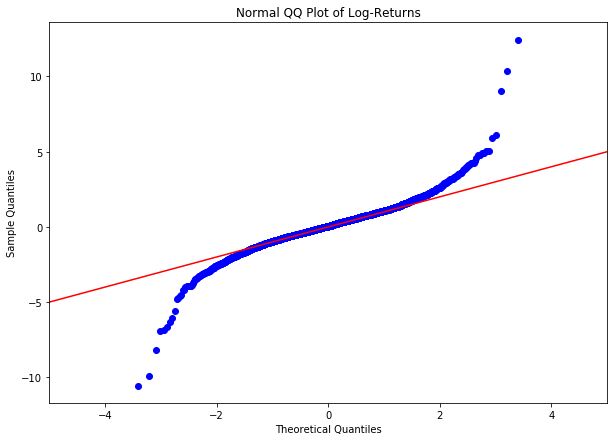

In [27]:
# This is how you control the figure size
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

sm.qqplot(r, line='45', ax=ax)
plt.title('Normal QQ Plot of Log-Returns')
plt.xlim(-5, 5);

**Question:** Discuss the distribution of percentage log returns for CBA (in less than 0.5 pages)

**Answer guide** As suggested by the sample skewness and kurtosis, the distribution of CBA returns seems close to symmetric and to have fatter tails than a Gaussian distribution. The distribution seems peaked in the middle and then to have long tails on either side, compared to a Gaussian, as shown in the density plots above. The long tails are caused by a small number of relatively extreme positive and negative returns (i.e. those few beyond -5\% and +5\%). Fat-tailed distributions tend to be associated with the concept of "outliers", loosely defined as a small number of data points that "do not fit in" with the rest of the data. In the case of financial return data, usually fat-tailed distributions are empirically characterised by a small number of (relatively) extreme returns, usually both positive and negative ones.  

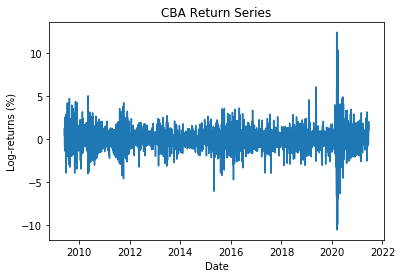

In [28]:
plt.plot(r)
plt.xlabel('Date')
plt.ylabel('Log-returns (%)')
plt.title('CBA Return Series')
plt.show()

**Question:** Discuss this plot and the time properties of CBA log returns. What aspects seem to change with time? Which seem to remain fairly constant or static over time?

**Answer guide** The mean CBA return seems to stay fairly constant over time, and fairly close to 0. Extreme returns seem to occur infrequently in no real pattern, except there are more during early 2020 (again some positive and some negative). The volatility or variance level does seem to change with time, being sometimes lower in some periods of time and sometimes higher in other time periods; E.g. in 2013 and then again in 2014 the day to day returns seem to have a smaller range and hence smaller variance, compared to e.g. 2009-2010, late 2011, early 2020 (among others). 

### Statistical Consequences of Fat Tails - Nassim Nicholas Taleb

Good introduction video on Fat tails and why they are important https://www.youtube.com/watch?v=t7Fr6iGhmBM

As Nassim Taleb puts it, 

    with fat tail distributions, extreme events away from the centre of the
    distribution play a very large role. Black Swans are not more frequent, they are more
    consequential. The fattest tail distribution has just one very large extreme deviation, rather
    than many departures form the norm
    
    ...
    
    As the tails fatten, to mimic what happens in financial markets for
    example, the probability of an event staying within one standard deviation of the mean
    rises to between 75 and 95 per cent.
    
    - Nassim Nicholas Taleb - Statistical Consequences of Fat Tails
    
A good example of a very fat tail distribution is: Consider we asked $10^6$ (1 million) people the amount of money people had, where 1 person had 1 million dollars and everyone had 0. 

$$\large \underbrace{0, 0, 0, \cdots, 0}_{10^6-1}, 10^6$$

This is a fat tail distribution because the chance of ramdomly picking the million dollar person is very unlikely. It is more likely to pick someone with 0 dollars. But when you do sample the person with a million dollars, it completely changes the average of the population, i.e. it changes the statistics of the population.

So what is happening is that, although the million dollar person is more unlikely to occur, when it does occur it completely changes the behaviour of the population. Meaning that all the information is actually occuring at the tails, not in the center.

How this applies to us is that market returns are fat tailed. In particular when we look at CBA returns vs gaussian distribution

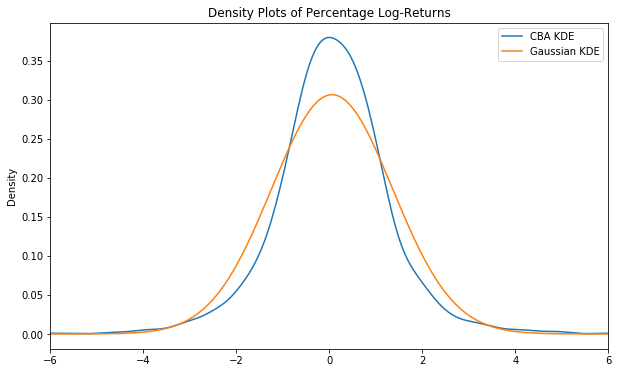

In [29]:
plt.figure(figsize=(10, 6))

r.plot.kde(label="CBA KDE")
plt.title('Density Plots of Percentage Log-Returns')
plt.xlim(-6, 6) # NB these liimts are approx the min, max of the data

x = np.linspace(-6, 6, 200)
plt.plot(x, stats.norm.pdf(x, np.mean(r), np.std(r)), label='Gaussian KDE')

plt.legend();

We can see that CBA's returns is actually more likely to stay around the average returns (0.05%), than a normal distribution will. But you can also see that the black swan events, the events far from the average (at $\pm 4$), do occur and when they do occur they will have effects on the returns.

In [30]:
np.mean(r)

0.05642427457699737

### Extreme tails
For financial return series, we are often interested in the extreme tails of the return distribution for risk modelling purposes. The `stats` module of the `scipy` library offers a range of useful functions for calculations involving statistical distributions. E.g., by default, `norm.ppf` and `t.ppf` are the quantile functions (also called the inverse CDF) of the standard Gaussian and Student-t (in standardised form) distributions, respectively. Please refer to the documentation of `scipy.stats` for more details: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

Note that you can standardise returns via
$$r_t^{\mathrm{std}} = \frac{r_t - \bar{r}}{s_r},$$
where $\bar{r}$ is the sample mean and $s_r$ is the sample standard deviation. 

#### Why do we want to standardise returns

This is a concept that we will encounter a lot in this course. Suppose $r_t$ followed some distribution (could be any distribution) with a mean of $\mu$ and variance of $\sigma^2$. So let us write this as $r_t\sim D(\mu,\sigma^2)$. Again, $D$ can be any distribution, it can be a normal distribution $\mathcal{N}(\mu,\sigma^2)$ or a students-t distribution $t_\nu(\mu,\sigma^2)$, or something else, it doesn't matter.

When we standardise the returns by
$$\hat{r}=\frac{r-\mu}{\sigma},\quad\textrm{where}\ r\sim D(\mu, \sigma^2)$$
it turns out, by basic math, that
$$\hat{r}\sim D(0, 1)$$
so the standardised returns now has a mean of 0, and a variance of 1. Thats it!

So the reason why we typically work with the standardised returns is because the mean is 0, and variance is 1. This makes it much easier to work with than $r$ which has a mean of $\mu$ and variance of $\sigma^2$.

In [34]:
r_vec = r
r_std = (r_vec - np.mean(r_vec)) / np.std(r_vec)

In [32]:
quantile = 0.001
print("CBA Sampled Quantile :", np.quantile(r_std, quantile))
print("Gaussian Quantile    :", stats.norm.ppf(quantile))
print("Students-t Quantile  :", stats.t.ppf(quantile, df=6))

CBA Sampled Quantile : -5.3683453121851
Gaussian Quantile    : -3.090232306167813
Students-t Quantile  : -5.207626238838043


In [33]:
quantile = 0.999
print("CBA Sampled Quantile :", np.quantile(r_std, quantile))
print("Gaussian Quantile    :", stats.norm.ppf(quantile))
print("Students-t Quantile  :", stats.t.ppf(quantile, df=8))

CBA Sampled Quantile : 4.626743017053581
Gaussian Quantile    : 3.090232306167813
Students-t Quantile  : 4.500790933725044


Recognise that it is at these extreme quantiles that we really care about, because it is events at these quantiles that will affect the statistical properties of the returns (fat tail behaviour).

**Question:** Which distribution above is more suited for modelling the tails of CBA returns?

**Answer guide** Clearly, a Student-t distribution with 6 or 8 degrees of freedom gives closer estimates of the 0.1 and 99.9 percentiles of gthe CBA return data, compared to a Gaussian distribution.

**Question:** What return might an investor expect to suffer on only 0.1% of days when investing in CBA stock? Calculate this under the two distributions used above and compare with the empirical quantile answer (much further) above.

**Question:** Do you think the log prices of CBA follow a Gaussian RW model?